In [36]:
import pandas as pd
import numpy as np

# Baca data iris
df = pd.read_csv('iris.csv', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

# Cek missing values
print("Missing Attribute Values:", "None" if df.isnull().sum().sum() == 0 else df.isnull().sum().sum())

# Hitung statistik deskriptif
stats = pd.DataFrame({
    'Min': df.iloc[:, 0:4].min(),
    'Max': df.iloc[:, 0:4].max(),
    'Mean': df.iloc[:, 0:4].mean().round(2),
    'SD': df.iloc[:, 0:4].std().round(2)
})

# Hitung korelasi dengan class (menggunakan label encoding untuk species)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species_encoded'] = le.fit_transform(df['species'])

correlations = []
for column in df.columns[0:4]:
    correlation = df[column].corr(df['species_encoded'])
    correlations.append(round(correlation, 4))

stats['Class Correlation'] = correlations

# Format output
print("\nSummary Statistics:")
for index, row in stats.iterrows():
    correlation_text = f"{row['Class Correlation']:.4f}"
    if abs(row['Class Correlation']) > 0.8:
        correlation_text += " (high!)"
        
    print(f"{index:>12}: {row['Min']:>4.1f} {row['Max']:>4.1f} {row['Mean']:>4.2f} {row['SD']:>4.2f}  {correlation_text}")

Missing Attribute Values: None

Summary Statistics:
sepal_length:  4.3  7.9 5.84 0.83  0.7826
 sepal_width:  2.0  4.4 3.05 0.43  -0.4194
petal_length:  1.0  6.9 3.76 1.76  0.9490 (high!)
 petal_width:  0.1  2.5 1.20 0.76  0.9565 (high!)


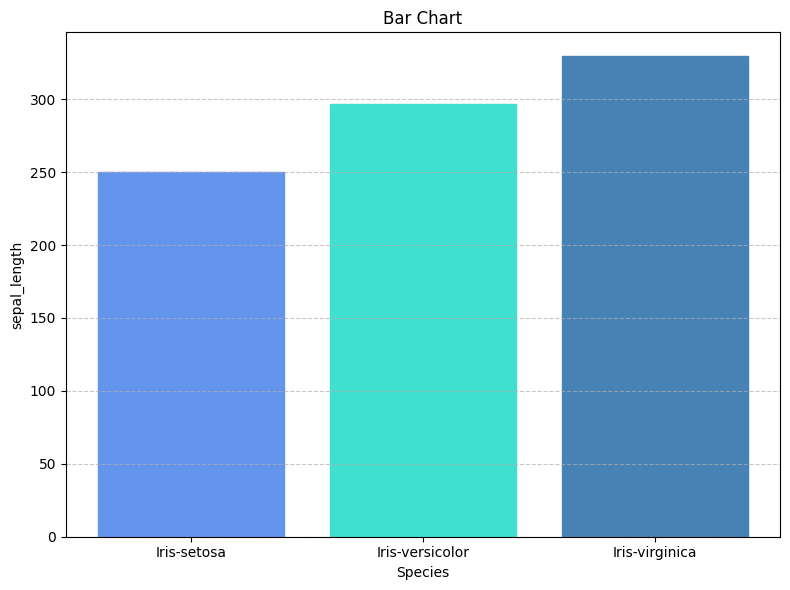

In [9]:
# Baca data iris
df = pd.read_csv('iris.csv', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

# Hitung total sepal_length untuk setiap species
total_sepal_length = df.groupby('species')['sepal_length'].sum()

# Buat diagram batang
plt.figure(figsize=(8, 6))
bars = plt.bar(total_sepal_length.index, total_sepal_length.values)

# Atur warna bar
colors = ['#6495ED', '#40E0D0', '#4682B4']  # Biru muda, Turquoise, Biru tua
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Tambahkan judul dan label
plt.title('Bar Chart')
plt.xlabel('Species')
plt.ylabel('sepal_length')

# Atur tampilan
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Tampilkan plot
plt.show()

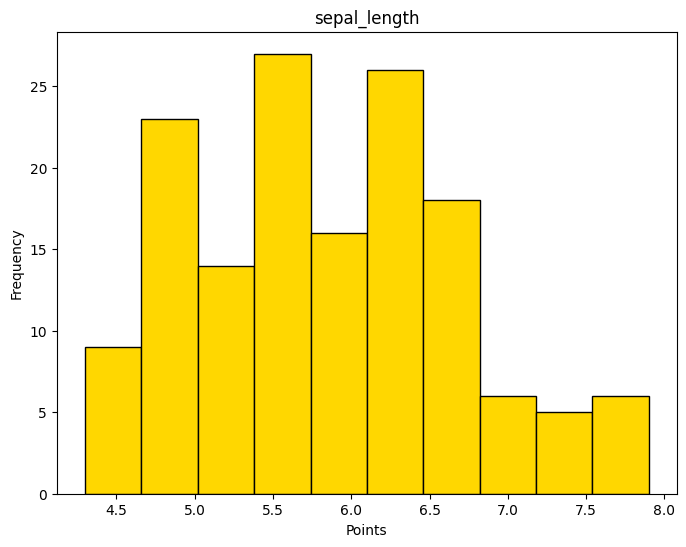

In [34]:
# Membuat histogram untuk sepal_length dari dataset iris
plt.figure(figsize=(8, 6))
plt.hist(df['sepal_length'], bins=10, color='gold', edgecolor='black')

# Menambahkan judul dan label
plt.title('sepal_length')
plt.xlabel('Points')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

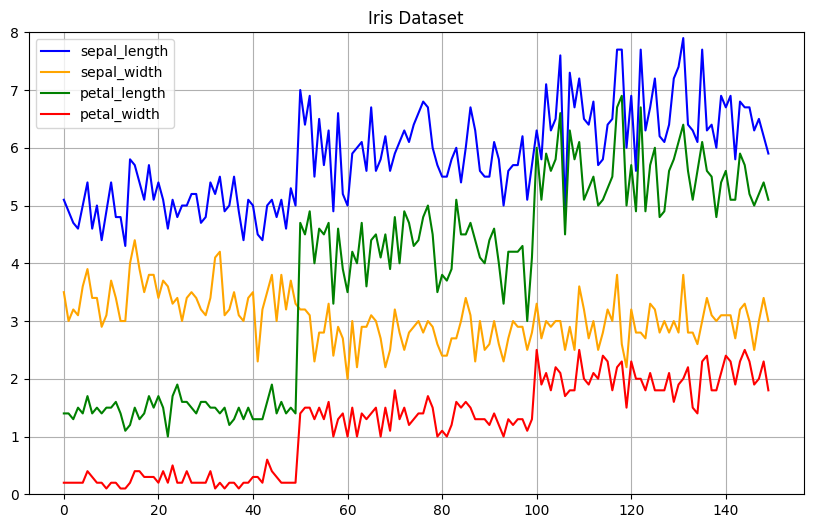

In [29]:
# Membuat grafik garis untuk semua atribut iris
plt.figure(figsize=(10, 6))

# Plot setiap atribut
plt.plot(df.index, df['sepal_length'], label='sepal_length', color='blue')
plt.plot(df.index, df['sepal_width'], label='sepal_width', color='orange')
plt.plot(df.index, df['petal_length'], label='petal_length', color='green')
plt.plot(df.index, df['petal_width'], label='petal_width', color='red')

# Menambahkan judul dan label
plt.title('Iris Dataset')
plt.ylim(0, 8)  # Sesuaikan batas y agar sesuai dengan gambar

# Menampilkan legenda dan grid
plt.legend()
plt.grid(True)
plt.show()

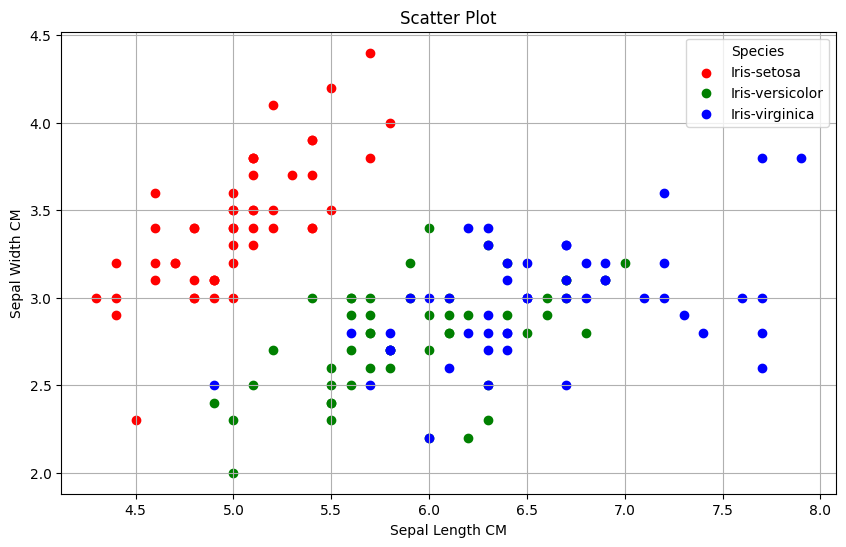

In [28]:
# Membuat scatter plot
plt.figure(figsize=(10, 6))
colors = {'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}

for species, data in df.groupby('species'):
    plt.scatter(data['sepal_length'], data['sepal_width'], label=species, color=colors[species])

plt.title('Scatter Plot')
plt.xlabel('Sepal Length CM')
plt.ylabel('Sepal Width CM')
plt.legend(title='Species')
plt.grid(True)
plt.show()